# Data Wrangling, analyzing and visualization of "WeRateDogs" Twitter data

## Introduction
Real-world data rarely comes clean. The objective of this work is to wrangle *_WeRateDog_* Twitter data - which is a Twitter page that rates people's dogs with a humorous comment about the dog - so as to create interesting and trustworthy analysis and visualizations. Data wrangling refers to the process of cleaning, restructuring and enriching the raw data available into a more usable format.

The Twitter archive is great, but it only contains very basic tweet information. Therefore, Additional gathering, assessing, and cleaning is required for worthy analysis and visualizations. By using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

## Data description

- The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which has been used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo), to make this Twitter archive "enhanced." Of the 5000+ tweets, they have been filtered for tweets with ratings only (there are 2356). These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.However, the ratings probably aren't all correct. Same goes for the dog names and probably dog stages too. So, i'll need to assess and clean these columns, to use them for analysis and visualization.

- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. It is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- The Tweet JSON data written to its own line in a file called tweet_json.txt file, including information about tweet's retweet count and favorite ("like") count.

## Table Of Contents
1. Data Gathering
    - twitter-archive-enhanced.csv
    - image-predictions.tsv
    - tweet-json.txt
2. Data Assessment
3. Data Cleaning
4. Data Storage
5. Exploratory Data Analysis

## Data Gathering
Gathering of data is the first step in data wrangling process. In this kernel, I'll gather data by downloading and reading data of different formats (csv, tsv, and json) into pandas dataframe. Before we jump into the wrangling process, it's important to import all the libraries we would be need.

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import plotly.express as px

from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data provided (twitter_archive_enhanced.csv) and read the data into the pandas dataframe

In [2]:
# read the 'twitter-archive-enhanced.csv' into pandas dataframe (df)
df = pd.read_csv('twitter-archive-enhanced.csv')
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

#### Description of the df2 columns:

- `tweet_id`: the unique identifier for each tweet
- `jpg_url`: dog's image URL
- `img_num`: the image number that corresponded to the most confident prediction
- `p1`: algorithm's #1 prediction for the image in the tweet
- `p1_conf`: how confident the algorithm is in its #1 prediction
- `p1_dog`: whether or not the #1 prediction is a breed of dog
- `p2`: algorithm's #2 prediction for the image in the tweet
- `p2_conf`: how confident the algorithm is in its #2 prediction
- `p2_dog`: whether or not the #2 prediction is a breed of dog
- `p3`: algorithm's #3 prediction for the image in the tweet
- `p3_conf`: how confident the algorithm is in its #3 prediction
- `p3_dog`: whether or not the #3 prediction is a breed of dog

#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# url containing the image-predictions.tsv dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# scrape the data from the web using requests
response = requests.get(url)

# write the scraped data to a file (image-predictions.tsv)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

# read the dataset to pandas dataframe (df2)
df2 = pd.read_csv('image-predictions.tsv', sep="\t")
df2

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

#### Description of the df2 columns:

| columns | Description |
| :- | :- |
| `tweet_id`| the unique identifier for each tweet
| `jpg_url`| dog's image URL
| `img_num`| the image number that corresponded to the most confident prediction
| `p1`| algorithm's #1 prediction for the image in the tweet
| `p1_conf`| how confident the algorithm is in its #1 prediction
| `p1_dog`| whether or not the #1 prediction is a breed of dog
| `p2` | algorithm's #2 prediction for the image in the tweet
| `p2_conf`| how confident the algorithm is in its #2 prediction
| `p2_dog`| whether or not the #2 prediction is a breed of dog
| `p3`| algorithm's #3 prediction for the image in the tweet
| `p3_conf`| how confident the algorithm is in its #3 prediction
| `p3_dog`| whether or not the #3 prediction is a breed of dog

#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# read the tweet-json.txt dataset into a panas dataframe (df5)
df5 = pd.read_json('tweet-json.txt', lines=True)
df5

created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2349  Here we have a 1949 1st generation vulpix. Enj...      False   
2350  This is a purebred Piers Morgan. Loves to Netf...      False   
2351  Here is a very happy pup. Big fan of well-main...      False   
2352  This is a western brown Mitsubishi terrier. Up...      False   
2353  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2349           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2350           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2351           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2352           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2353           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2349  {'media': [{'id': 666049244999131136, 'id_str'...   
2350  {'media': [{'id': 666044217047650304, 'id_str'...   
2351  {'media': [{'id': 666033409081393153, 'id_str'...   
2352  {'media': [{'id': 666029276303482880, 'id_str'...   
2353  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r..

In [5]:
# list the columns of df5
df5.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [6]:
# create a new df with 3 columns and rename the id column to tweet_id
df3 = df5[['id', 'retweet_count', 'favorite_count']].rename(columns={'id':'tweet_id'})
# display the first 5 rows of the dataframe
df3.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

Description of the df3 columns:
- `tweet_id`: the unique identifier for each tweet;
- `retweet_count`: number of times this tweet has been retweeted;
- `favorite_count`: indicates approximately how many times this tweet has been liked by Twitter users.

## Assessing Data
In this section, I'll detect and document at least eight (8) quality issues and two (2) tidiness issues, both via visual assessment and programmatic assessment to assess the data.


In [7]:
# randomly select 10 rows from df
df.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1349  704134088924532736                    NaN                  NaN   
520   810254108431155201                    NaN                  NaN   
428   821149554670182400                    NaN                  NaN   
1871  675147105808306176                    NaN                  NaN   
714   784057939640352768                    NaN                  NaN   
1186  718540630683709445                    NaN                  NaN   
647   793135492858580992                    NaN                  NaN   
2187  668979806671884288                    NaN                  NaN   
1102  735274964362878976                    NaN                  NaN   
117   870063196459192321                    NaN                  NaN   

                      timestamp  \
1349  2016-02-29 02:40:23 +0000   
520   2016-12-17 22:43:27 +0000   
428   2017-01-17 00:18:04 +0000   
1871  2015-12-11 02:56:28 +0000   
714   2016-10-06 15:49:14 +0000   
1186  2016-04-08 20:46:50 +0000   
647   2016-10-31 17:00:11 +0000   
2187  2015-11-24 02:29:49 +0000   
1102  2016-05-25 01:03:06 +0000   
117   2017-05-31 23:43:25 +0000   

                                                 source  \
1349  <a href="http://vine.co" rel="nofollow">Vine -...   
520   <a href="http://twitter.com/download/iphone" r...   
428   <a href="http://twitter.com/download/iphone" r...   
1871  <a href="http://twitter.com/download/iphone" r...   
714   <a href="http://vine.co" rel="nofollow">Vine -...   
1186  <a href="http://twitter.com/download/iphone" r...   
647   <a href="http://twitter.com/download/iphone" r...   
2187  <a href="http://twitter.com/download/iphone" r...   
1102  <a href="http://twitter.com/download/iphone" r...   
117   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1349  This sneezy pupper is just adorable af. 12/10 ...                  NaN   
520   This is Gus. He likes to be close to you, whic...                  NaN   
428   This is Luca. He got caught howling. H*ckin em...                  NaN   
1871  When you're presenting a group project and the...                  NaN   
714   This is Balto. He's very content. Legendary to...                  NaN   
1186  Get you a pup that can do both. 10/10 https://...                  NaN   
647   Your favorite squad is looking extra h*ckin sp...                  NaN   
2187  This is Chaz. He's an X Games half pipe supers...                  NaN   
1102  We only rate dogs. Please stop sending in your...                  NaN   
117   Meet Clifford. He's quite large. Also red. Goo...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1349                       NaN                        NaN   
520                        NaN                        NaN   
428                        NaN                        NaN   
1871                       NaN                        NaN   
714                        NaN                        NaN   
1186                       NaN                        NaN   
647                        NaN                        NaN   
2187                       NaN                        NaN   
1102                       NaN                        NaN   
117                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1349                      https://vine.co/v/igW2OEwu9vg                12   
520   https://twitter.com/dog_rates/status/810254108...                12   
428   https://twitter.com/dog_rates/status/821149554...                12   
1871  https://twitter.com/dog_rates/status/675147105...                10   
714                       https://vine.co/v/5gKxeUpuKEr                12   
1186  https://twitter.com/dog_rates/status/718540630...                10   
647   https://twitter.com/dog_rates/status/793135492...                13   
2187  https://twit

##### Notes:
- we see that the columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp mainly comprises of missing values
- the source column contains html tag
- the columns doggo, floofer, pupper, and puppo contains None which means missing values
- the name column contains inappropriate name for a dog -  letter 'a'

let's have a look at the information of the dataframe...

In [8]:
# displays the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contain missing values
- inappropriate dtype in the tweet_id and timestamp columns

In [9]:
# displays the descriptive statistics of the dataframe
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

from the descriptive statistics, we see that rating_numerator and rating_denominator contains 0 as their minimum value and huge number greater than what's expected as their max value. From the description of the twitter 'WeRateDogs' page, we were told that the denominator of the rating should be 10. Also, the rating numerator should be 10 and above. keeping those in mind, we'd also check for outliers (skewness) in the dataset arising form the huge number in the rating_numerator column.
let's check the value count of unique values in the rating_denominator and rating_numerator columns, respectively.

In [10]:
# displays the value count of each unique value
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [11]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

rating_denominator contains values greater than 10, while the rating_numerator column contains values huge values than can be safely regarded as inappropriate or outliers that will [definitely] affect analysis on the dataframe.

Still on the assessment of the df dataframe, let's check the sum of missing values in each of the columns.

In [12]:
# sums up the number of missing values in each of the columns of the dataframe
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

There are 2278 missing values in the in_reply_to_status_id, in_reply_to_user_id columns; 2175 missing values in the retweeted_status_id and retweeted_status_user_id, and retweeted_status_timestamp columns; and 59 missing values in the expanded_urls column, respectively.

Next, let's check if there's any duplicated rows in the dataset

In [13]:
# sums the number of duplicated rows in the dataframe (df)
df.duplicated().sum()

0

df contains no duplicated rows.

#####  Name
from visually assessment of the dataframe (df), we saw that df contains 'a' as a name of a dog. lets programmatically assess the name column.

In [14]:
# displays the value counts of the unique value in the name column of the dataframe
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Link         1
Tyrus        1
Eleanor      1
Obie         1
Deacon       1
Name: name, Length: 957, dtype: int64

from the output above, the name column contains 745 None as a name - which, in this case, represent dogs whose names were not captured (missing values). Also, the unique names appears to be proper noun (the first letter capitalized). and we see 'a' which doesn't seem to be an appropriate name be in lower case. Let's investigate this to see if there's any other letter in lower case.

In [15]:
# List all names that aren't capitalized
error_names = df.name.str.contains('^[a-z]', regex = True)
df[error_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [16]:
len(df[error_names])

109

there are 109 missappropriate names and 745 missing values in the the name column.  

##### Source
let's programmatically assess the source column by displaying the value counts of the unique values

In [17]:
# displays the value counts of the unque values in the 'source' column
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We see that the source column contains 4 unique values - html tag containing an url and the source client

### Text

In [18]:
# slice and display the content of the 2nd row of the text column
df.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

From the output we see that the text has an integrated Url. Lets investigate how many rows in the text column has an embedded Url.

In [19]:
# sum the number of rows in the text column containing an embedded Url
(df.text.str.contains('http')==True).sum()

2286

2286 rows have an embedded Url.

### Dataframe: df2

In [20]:
# dispaly the information of the dataframe (df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# displays 10 random rows from df2 
df2.sample(10)

tweet_id                                          jpg_url  \
240   670442337873600512  https://pbs.twimg.com/media/CU3jwAYWwAAhdAv.jpg   
280   671115716440031232  https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg   
1061  715200624753819648  https://pbs.twimg.com/media/CeznK6IWEAEFUPq.jpg   
497   675798442703122432  https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg   
1359  760893934457552897  https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg   
110   667886921285246976  https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg   
1044  712717840512598017  https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg   
1495  783347506784731136  https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg   
1315  754874841593970688  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
817   692894228850999298  https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg   

      img_num                           p1   p1_conf  p1_dog              p2  \
240         1               Sussex_spaniel  0.403552    True      otterhound   
280         1                     malinois  0.406341    True          kelpie   
1061        1                    Chihuahua  0.956787    True          beagle   
497         1                       beagle  0.681218    True          basset   
1359        1             Blenheim_spaniel  0.113992    True  cocker_spaniel   
110         1                   Pomeranian  0.800432    True        Pekinese   
1044        1               Great_Pyrenees  0.732043    True          kuvasz   
1495        1                     Cardigan  0.611525    True        Pembroke   
1315        1                          pug  0.272205    True    bull_mastiff   
817         1  German_short-haired_pointer  0.876977    True        bluetick   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
240   0.256302    True       Irish_terrier  0.187315    True  
280   0.143366    True               dingo  0.129802   False  
1061  0.008383    True  Labrador_retriever  0.008344    True  
497   0.125121    True               boxer  0.080398    True  
1359  0.105780    True              borzoi  0.073935    True  
110   0.168445    True           Chihuahua  0.008950    True  
1044  0.121375    True     Irish_wolfhound  0.049524    True  
1495  0.368566    True           Chihuahua  0.003330    True  
1315  0.251530    True          bath_towel  0.116806   False  
817   0.036615    True              basset  0.017848    True

In [22]:
df2[['p1', 'p2', 'p3']]

p1                  p2                           p3
0     Welsh_springer_spaniel              collie            Shetland_sheepdog
1                    redbone  miniature_pinscher          Rhodesian_ridgeback
2            German_shepherd            malinois                   bloodhound
3        Rhodesian_ridgeback             redbone           miniature_pinscher
4         miniature_pinscher          Rottweiler                     Doberman
...                      ...                 ...                          ...
2070                  basset    English_springer  German_short-haired_pointer
2071             paper_towel  Labrador_retriever                      spatula
2072               Chihuahua            malamute                       kelpie
2073               Chihuahua            Pekinese                     papillon
2074                  orange               bagel                       banana

[2075 rows x 3 columns]

_Notes:_
- inappropriate dtype of the tweet_id column
- p1, p2 and p3 columns contain inconsistent letter case

In [23]:
# displays the descriptive statistics of df2
df2.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

### Dataframe: df3

In [24]:
# displays the information of the dataframe (df3)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


- inappropriare dtype - tweet_id

In [25]:
# displays 10 random rows of df3
df3.sample(10)

tweet_id  retweet_count  favorite_count
2274  667443425659232256            620             833
1129  728986383096946689            917            3460
486   814153002265309185          10080           32000
286   838561493054533637           1504           11892
556   803380650405482500           2169            8601
505   812747805718642688           8067               0
152   862457590147678208           5388           21492
839   766864461642756096           6521               0
59    880465832366813184           6546           29075
1542  689517482558820352           1609            3735

In [26]:
# check for duplicates
df3.duplicated().any()

False

In [27]:
# displays the descriptive statistics of df3
df3.describe()

tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

## Quality Issues Identified

#### df
- contains missing values in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp columns`, and `expanded_urls` columns.
- `timestamp` column (of the df dataframe) is encoded as an object datatype.
- `tweet_id` (in all 3 dataframes) column has int64 datatype when it holds no numeric significance.
- `source` column contains ambiguous HTML tags that embeds the source 
- `text` column contains an Url at the end of the text
- `rating_denominator` contains values [both] greater(max)/less(min) than 10.
- multiple dog_breed predictions 
-  incorrect labelled values in the `name` column

#### df2
- inconsistent use of letter case in the columns `p1`, `p2` and `p3` columns of df2 dataframe.
- contains deplicated observation in the jpg_url column
- contains non-dogs images



## Tidiness Issues Identified
- the columns `doggo`, `pupper`, `floofer`, `puppo` (which are all dog stages) should be collapsed into a column
- extract the tweet source from the html tag
- having 3 dataset would make analysis difficult

##  Data Cleaning

In this section I'll clean and fix all the issues, both 'Quality and Tidiness', identified in the previous section. In order to preserve the original datasets, I'll make a copy of all three dataset. And work on the datasets copies.

In [28]:
# make copies of all 3 datasets
twitter_archive = df.copy()
image_predictions = df2.copy()
tweet_json = df3.copy()

#### Tidiness 1: merge the 3 dataframes to form a master_dataframe

As mentioned, working with individual dataset can be rather daunting. In order to reduce the complicacies of cleaning multiple dataset, I'll collapse all 3 dataset to form a master-dataset. To archive this, I'll use the pandas *merge* method.

In [29]:
# merge image_predictions dataframe with tweet_json dataframe on tweet_id
unclean_df = pd.merge(image_predictions, tweet_json, how='inner', on='tweet_id')

# merge the result (unclean_df) with twitter_archive dataframe on tweet_id
unclean_df = pd.merge(twitter_archive, unclean_df, how='inner', on='tweet_id')

In [30]:
# confirm the changes were effected by calling the head method on the dataframe
unclean_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...   p1_conf  p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...  ...  0.097049   False   
1  https://twitter.com/dog_rates/status/892177421...  ...  0.323581    True   
2  https://twitter.com/dog_rates/status/891815181...  ...  0.716012    True   
3  https://twitter.com/dog_rates/status/891689557...  ...  0.170278   False   
4  https://twitter.com/dog_rates/status/891327558...  ...  0.555712    True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  retweet_count favorite_count  
0  False           8853          39467  
1   True           6514          33819  
2   True           4328          25461  
3  False           8964          42908  
4   True           9774          41048  

[5 rows x 30 columns]

Now we have a master dataset [although pretty messy and untidy], we can proceed to clean up the quirks, inconsistency and errors identified and listed

From dataframe info, we see that the shape of the dataframe is 2073 observations (rows) and 30 columns.  

#####  **Quality 1** : Missing values
the columns `in_reply_to_status_id`, `in_reply_to_user_id` has only 1 percent records of the length of the dataframe, while the columns `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` contains only but less than 5 percent entries (records). There are several ways to fix the problem of missing values (data), such as sourcing for the data, filling the missing values with the column's standard tendency [or constant], if datatype is of *`integer`* or *`float`* But for the sake of this Data Wrangling Project, we'll drop these columns.

In [32]:
# columns with high missing values
colns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
         'retweeted_status_user_id', 'retweeted_status_timestamp']
index_list = []
for col in colns:
    to_drop = unclean_df[unclean_df[col].notna()].index
    index_list.extend(to_drop)

index = []
for item in set(index_list):
    index.append(item)

# drop non-null rows  in the columns with high missing values
df_clean = unclean_df.drop(index=index, axis=0)

# drop columns
df_clean = df_clean.drop(columns=colns, axis=1)
df_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer  ...   p1_conf p1_dog  \
0                  10   Phineas  None    None  ...  0.097049  False   
1                  10     Tilly  None    None  ...  0.323581   True   
2                  10    Archie  None    None  ...  0.716012   True   
3                  10     Darla  None    None  ...  0.170278  False   
4                  10  Franklin  None    None  ...  0.555712   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  retweet_count  favorite_count  
0  False           8853           39467  
1   True           6514           33819  
2   True           4328           25461  
3  False           8964           42908  
4   True           9774           41048  

[5 rows x 25 columns]

In [33]:
# confirm the changes [deleted columns] were effected
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  jpg_url             1971 non-null   object 
 13  img_num             1971 non-null   int64  
 14  p1                  1971 non-null   object 
 15  p1_conf             1971 non-null   float64
 16  p1_dog

#####  **Quality 2** : Incorrect datatype of the timestamp column
let's convert the datatype of the timestamp column to reflect the appropriate datatype - datatime.

In [34]:
# truncate the timestamp column to include only datetime
df_clean['timestamp'] = df_clean['timestamp'].str[:-5]

# convert timestamp datatype to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [35]:
# display the info of the dataframe to confirm the changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
 12  jpg_url             1971 non-null   object        
 13  img_num             1971 non-null   int64       

#### Quality issue 3: Inappropriate datatype of the tweet_id column
We observed [earlier on] that the column `tweet_id` possesses no numeric significance. Let's convert the datatype of the tweet_id column to object (string) datatype

In [36]:
# convert the datatype of the tweet_id column to object dtype
df_clean['tweet_id'] = df_clean['tweet_id'].astype('object')

In [37]:
# displace the info of the dataframe to confirm changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
 12  jpg_url             1971 non-null   object        
 13  img_num             1971 non-null   int64       

#### Quality 4: HTML tag in the source column
the source column contain ambiguous HTML tag that contains a Url with an embedded source. Let's extract the source from the Html tag to simplify the source column

In [38]:
# view the unique values of the source columns and the count, respectively
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [39]:
# Using the str.extract with re to extract any word characters,
# spaces and other character in the main string in the source column 
# between character > and <
df_clean['source'] = df_clean['source'].str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')

In [40]:
# call the value counts method on the source column to confirm the changes
df_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Quality 5: Url at the end of the text, respectively, in the text column

In [41]:
# slice the 2nd row of the text column
df.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [42]:
# number of row in the text column containing 'http'
(df_clean.text.str.contains('http')==True).sum()

1971

In [43]:
# find and cut off the last element ('http...') from text column
df_clean.text = df_clean.text.apply(lambda x:x[: x.find("http")]).str.strip()

In [44]:
# checks the number of rows in the text column containing 'http'
(df_clean.text.str.contains('http')==True).sum()

0

#### Quality 6: rows contain  rating_denominator greater/lesser than 10

Let's fix this issue by slicing (truncating) the dataset to remove rating_numerator lesser than 1 and rating_denomination that are not equal to 10 

In [45]:
# filter dataframe to containing only rating_numerator > 0 and
# rating_denominator eqaul to 10
df_clean = df_clean[(df_clean.rating_numerator > 0) & (df_clean.rating_denominator == 10)]

In [46]:
# displays the descriptive statistics for the dataframe
df_clean.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       1953.000000              1953.0  1953.000000  1953.000000   
mean          11.706605                10.0     1.201229     0.593874   
std           41.089260                 0.0     0.558062     0.272275   
min            1.000000                10.0     1.000000     0.044333   
25%           10.000000                10.0     1.000000     0.362596   
50%           11.000000                10.0     1.000000     0.587372   
75%           12.000000                10.0     1.000000     0.846628   
max         1776.000000                10.0     4.000000     1.000000   

            p2_conf       p3_conf  retweet_count  favorite_count  
count  1.953000e+03  1.953000e+03    1953.000000     1953.000000  
mean   1.349585e-01  6.013536e-02    2785.522273     8963.339990  
std    1.011503e-01  5.080748e-02    4706.534644    12300.305427  
min    1.011300e-08  1.740170e-10      16.000000       81.000000  
25%    5.387110e-02  1.605220e-02     624.000000     1957.000000  
50%    1.176080e-01  4.948690e-02    1366.000000     4147.000000  
75%    1.963070e-01  9.157150e-02    3240.000000    11411.000000  
max    4.880140e-01  2.710420e-01   79515.000000   132810.000000

Since we have the denominator consistent through out the dataframe, it' safe to drop the `rating_denominator` column. Also, we can rename the `rating_numerator` column to `rating`

In [47]:
# drop the rating_denominator column
df_clean.drop('rating_denominator', axis=1, inplace=True)

# rename the rating_numerator to rating
df_clean.rename(columns={'rating_numerator':'rating'}, inplace=True)

In [48]:
# displays the info of the dataframe and confirm changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1953 non-null   object        
 1   timestamp       1953 non-null   datetime64[ns]
 2   source          1953 non-null   object        
 3   text            1953 non-null   object        
 4   expanded_urls   1953 non-null   object        
 5   rating          1953 non-null   int64         
 6   name            1953 non-null   object        
 7   doggo           1953 non-null   object        
 8   floofer         1953 non-null   object        
 9   pupper          1953 non-null   object        
 10  puppo           1953 non-null   object        
 11  jpg_url         1953 non-null   object        
 12  img_num         1953 non-null   int64         
 13  p1              1953 non-null   object        
 14  p1_conf         1953 non-null   float64       
 15  p1_d

#### Quality 7: Inconsistency in the columns `p1`, `p2`, and `p3` 

We noticed, there were inconsistent case accross the columns p1, p2, and p3. Let's fix this by replacing underscore (_) with a white space, and format the value with string title

In [49]:
# replece the '_' with ' ' and call the title method on the columns 'p1', p2', and 'p3'
df_clean['p1'] = df_clean['p1'].str.replace('_', " ").str.title()
df_clean['p2'] = df_clean['p2'].str.replace('_', " ").str.title()
df_clean['p3'] = df_clean['p3'].str.replace('_', " ").str.title()

In [50]:
# display the p1, p2, p3 dataframe 
df_clean[['p1', 'p2', 'p3']]

p1                  p2                           p3
0                     Orange               Bagel                       Banana
1                  Chihuahua            Pekinese                     Papillon
2                  Chihuahua            Malamute                       Kelpie
3                Paper Towel  Labrador Retriever                      Spatula
4                     Basset    English Springer  German Short-Haired Pointer
...                      ...                 ...                          ...
2068      Miniature Pinscher          Rottweiler                     Doberman
2069     Rhodesian Ridgeback             Redbone           Miniature Pinscher
2070         German Shepherd            Malinois                   Bloodhound
2071                 Redbone  Miniature Pinscher          Rhodesian Ridgeback
2072  Welsh Springer Spaniel              Collie            Shetland Sheepdog

[1953 rows x 3 columns]

#### Quality 8: incorrect labelled values in the name column
earlier, we had noticed that the dog name in lower case letter are inapproprite names for a dog. hence, to clean that up, we'd covert all the lower case names to Nan. 

In [51]:
# set lowercase names to NaN and replace None [values] to NaN
mask1 = df_clean.name.str.islower()
df_clean.loc[(mask1), 'name'] = np.NaN
df_clean['name'] = df_clean['name'].replace('None', np.NaN)

In [52]:
df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2068         NaN
2069         NaN
2070         NaN
2071         NaN
2072         NaN
Name: name, Length: 1953, dtype: object

#### Tidiness 2: Multiple Dog_breed Prediction

from the dataframe description, we saw that p1_dog, p2_dog, and p3_dog returns True if the prediction is a dog. Let's define a function that returns the breed of dog is the algorithm predicts a dog, and Nan if the prediction is not a dog

In [53]:
def pred_dog(row):
    """
    A function that takes a prediction as an input and returns
    the breed of the dog if the prediction is a dog.
    """
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

# create a new column 'dog_breed' and write the breed of the dog
# as a row 
df_clean['dog_breed'] = df_clean.apply(pred_dog, axis=1)

In [54]:
# display the info of the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1953 non-null   object        
 1   timestamp       1953 non-null   datetime64[ns]
 2   source          1953 non-null   object        
 3   text            1953 non-null   object        
 4   expanded_urls   1953 non-null   object        
 5   rating          1953 non-null   int64         
 6   name            1346 non-null   object        
 7   doggo           1953 non-null   object        
 8   floofer         1953 non-null   object        
 9   pupper          1953 non-null   object        
 10  puppo           1953 non-null   object        
 11  jpg_url         1953 non-null   object        
 12  img_num         1953 non-null   int64         
 13  p1              1953 non-null   object        
 14  p1_conf         1953 non-null   float64       
 15  p1_d

We see that there are several missing values in the newly created dog_breed column, let's verify this by displaying the missing value counts of the dog_breed column

In [55]:
# output number of null values in the dog_breed column
df_clean.dog_breed.isnull().sum()

304

the dog_breed column contails 318 null values. Next, Let's drop these columns `p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog` columns

In [56]:
# drop columns
df_clean = df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                          'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [57]:
# display the info of the dataframe df_clean
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1953 non-null   object        
 1   timestamp       1953 non-null   datetime64[ns]
 2   source          1953 non-null   object        
 3   text            1953 non-null   object        
 4   expanded_urls   1953 non-null   object        
 5   rating          1953 non-null   int64         
 6   name            1346 non-null   object        
 7   doggo           1953 non-null   object        
 8   floofer         1953 non-null   object        
 9   pupper          1953 non-null   object        
 10  puppo           1953 non-null   object        
 11  jpg_url         1953 non-null   object        
 12  img_num         1953 non-null   int64         
 13  retweet_count   1953 non-null   int64         
 14  favorite_count  1953 non-null   int64         
 15  dog_

#### Tidiness 3: multiple columns created for various dog stages
melt the 4 dog stages, namely: `doggo`, `pupper`, `floofer`, `puppo`, into a new column - dog_stage

In [58]:
# replace None values [within the various columns] with NaN
df_clean = df_clean[~((df_clean['doggo'] != 'doggo') & (df_clean['floofer'] != 'floofer') & 
                      (df_clean['pupper'] != 'pupper') & (df_clean['puppo'] != 'puppo'))].replace('None', np.nan)


In [59]:
df_clean.head()

tweet_id           timestamp              source  \
9   890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
12  889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
14  889531135344209921 2017-07-24 17:02:04  Twitter for iPhone   
28  886366144734445568 2017-07-15 23:25:31  Twitter for iPhone   
38  884162670584377345 2017-07-09 21:29:42  Twitter for iPhone   

                                                 text  \
9   This is Cassie. She is a college pup. Studying...   
12  Here's a puppo that seems to be on the fence a...   
14  This is Stuart. He's sporting his favorite fan...   
28  This is Roscoe. Another pupper fallen victim t...   
38  Meet Yogi. He doesn't have any important dog m...   

                                        expanded_urls  rating    name  doggo  \
9   https://twitter.com/dog_rates/status/890240255...      14  Cassie  doggo   
12  https://twitter.com/dog_rates/status/889665388...      13     NaN    NaN   
14  https://twitter.com/dog_rates/status/889531135...      13  Stuart    NaN   
28  https://twitter.com/dog_rates/status/886366144...      12  Roscoe    NaN   
38  https://twitter.com/dog_rates/status/884162670...      12    Yogi  doggo   

   floofer  pupper  puppo                                          jpg_url  \
9      NaN     NaN    NaN  https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg   
12     NaN     NaN  puppo  https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
14     NaN     NaN  puppo  https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
28     NaN  pupper    NaN  https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
38     NaN     NaN    NaN  https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg   

    img_num  retweet_count  favorite_count         dog_breed  
9         1           7711           32467          Pembroke  
12        1           8538           38818          Pembroke  
14        1           2321           15359  Golden Retriever  
28        1           3316           21524    French Bulldog  
38        1           3128           20771   German Shepherd

In [60]:
# combine the columns the columns: 'doggo', floofer, pupper, and puppo
# into a single column 
df_clean = pd.melt(df_clean, id_vars=['tweet_id', 'timestamp', 'source', 'jpg_url','text', 
                                                    'expanded_urls', 'img_num','rating', 'name', 
                                                    'retweet_count', 'favorite_count', 'dog_breed'],
                    var_name = 'dog_stage', value_name = 'value')

In [61]:
# drop dog_stage column
df_clean.drop('dog_stage', axis=1, inplace=True)
# rename the column name 'value' to dog_stage
df_clean.rename({'value':'dog_stage'}, axis=1, inplace=True)

In [62]:
# convert the datatype of dog_stage to category
df_clean.dog_stage = df_clean.dog_stage.astype('category')
df_clean['tweet_id'] = df_clean.tweet_id.astype('object')

In [63]:
# display the info of the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1212 non-null   object        
 1   timestamp       1212 non-null   datetime64[ns]
 2   source          1212 non-null   object        
 3   jpg_url         1212 non-null   object        
 4   text            1212 non-null   object        
 5   expanded_urls   1212 non-null   object        
 6   img_num         1212 non-null   int64         
 7   rating          1212 non-null   int64         
 8   name            708 non-null    object        
 9   retweet_count   1212 non-null   int64         
 10  favorite_count  1212 non-null   int64         
 11  dog_breed       1028 non-null   object        
 12  dog_stage       313 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(4), object(7)
memory usage: 115.1+ KB


## Data Storage

In [64]:
rate_dog_clean = df_clean.copy()

In [65]:
rate_dog_clean.to_csv('twitter_archive_master.csv', index=False)

## Exploratory Data Analysis

In [66]:
rate_dog_clean.head()

tweet_id           timestamp              source  \
0  890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
1  889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
2  889531135344209921 2017-07-24 17:02:04  Twitter for iPhone   
3  886366144734445568 2017-07-15 23:25:31  Twitter for iPhone   
4  884162670584377345 2017-07-09 21:29:42  Twitter for iPhone   

                                           jpg_url  \
0  https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg   
1  https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2  https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
3  https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
4  https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg   

                                                text  \
0  This is Cassie. She is a college pup. Studying...   
1  Here's a puppo that seems to be on the fence a...   
2  This is Stuart. He's sporting his favorite fan...   
3  This is Roscoe. Another pupper fallen victim t...   
4  Meet Yogi. He doesn't have any important dog m...   

                                       expanded_urls  img_num  rating    name  \
0  https://twitter.com/dog_rates/status/890240255...        1      14  Cassie   
1  https://twitter.com/dog_rates/status/889665388...        1      13     NaN   
2  https://twitter.com/dog_rates/status/889531135...        1      13  Stuart   
3  https://twitter.com/dog_rates/status/886366144...        1      12  Roscoe   
4  https://twitter.com/dog_rates/status/884162670...        1      12    Yogi   

   retweet_count  favorite_count         dog_breed dog_stage  
0           7711           32467          Pembroke     doggo  
1           8538           38818          Pembroke       NaN  
2           2321           15359  Golden Retriever       NaN  
3           3316           21524    French Bulldog       NaN  
4           3128           20771   German Shepherd     doggo

In [67]:
rate_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1212 non-null   object        
 1   timestamp       1212 non-null   datetime64[ns]
 2   source          1212 non-null   object        
 3   jpg_url         1212 non-null   object        
 4   text            1212 non-null   object        
 5   expanded_urls   1212 non-null   object        
 6   img_num         1212 non-null   int64         
 7   rating          1212 non-null   int64         
 8   name            708 non-null    object        
 9   retweet_count   1212 non-null   int64         
 10  favorite_count  1212 non-null   int64         
 11  dog_breed       1028 non-null   object        
 12  dog_stage       313 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(4), object(7)
memory usage: 115.1+ KB


In [68]:
rate_dog_clean.describe()

img_num       rating  retweet_count  favorite_count
count  1212.000000  1212.000000    1212.000000     1212.000000
mean      1.267327    11.099010    3837.679868    11270.059406
std       0.648562     1.981775    7494.210815    16580.129769
min       1.000000     3.000000     103.000000      693.000000
25%       1.000000    10.000000     877.000000     2706.000000
50%       1.000000    11.000000    1760.000000     5575.000000
75%       1.000000    12.000000    3678.000000    12616.000000
max       4.000000    27.000000   79515.000000   132810.000000

##### What's the distribution of the dogs ratings

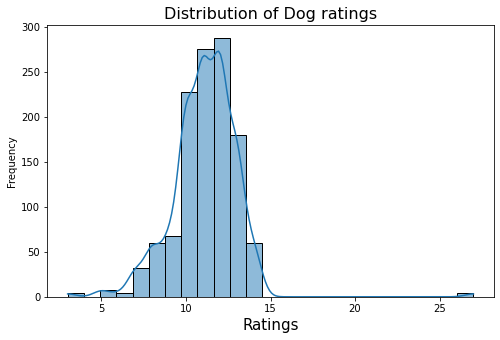

In [69]:
plt.figure(figsize=(8,5))
sns.histplot(data=rate_dog_clean, x='rating', kde=True, bins=25);
# plt.xscale('log')
plt.title('Distribution of Dog ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Frequency')
plt.show()

From the plot, we see that the distribution of the dog rating is not normally distributed. Rather, it is skew to the left.

Question: 
- what are the most common dog breeds in the dataset
- What's the top 5 dog breed

In [70]:
top_5_breed = rate_dog_clean.dog_breed.value_counts()[:5]
top_5_breed

Golden Retriever      136
Labrador Retriever     68
Pembroke               52
Pug                    44
Pomeranian             40
Name: dog_breed, dtype: int64

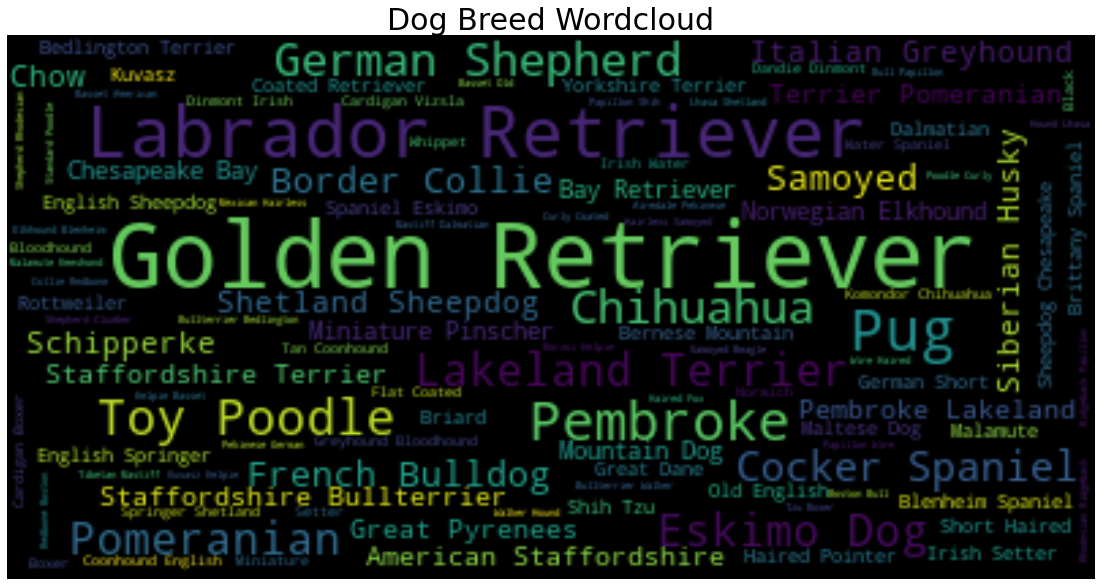

In [71]:
# Wordcloud for dog_breed visualization:
text = rate_dog_clean.loc[:, 'dog_breed'].str.cat(others=None, sep=' ')


# Instantiate word cloud object
wc = WordCloud()
# Generate word cloud
wc.generate(text)
# Show word cloud
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=30)
plt.axis('off');

In [72]:
# annotate plot with text
text = [(str(np.round(annot,2))) for annot in top_5_breed.values]

# bar plot of the top 5 dog breed
fig = px.bar(x=top_5_breed.index,
             y=top_5_breed.values,
             text=text,
             template='plotly_dark',
             labels=dict(x='Dog breeds', y='Frequency (Count)'),
             title='Top 5 Dog Breed ')
fig.update_traces(textposition='outside')
fig.show()

The top five (5) dog breeds are: 
- Golden Retriever
- Labradit Retriever
- Pembroke
- Pomeranian
- Pug

##### What are the top 5 dog breed with the highest favorite count

In [73]:
highest_rating = rate_dog_clean.groupby(['dog_breed'])['favorite_count'].sum().sort_values(ascending=False).head()
highest_rating

dog_breed
Golden Retriever      1841064
Labrador Retriever    1212124
Pembroke               684004
Lakeland Terrier       580356
French Bulldog         549148
Name: favorite_count, dtype: int64

In [74]:
# annotate plot with text
text = [(str(np.round(annot/1000000,2))+'M') for annot in highest_rating.values]

# bar plot of the top 5 dog breed
fig = px.bar(x=highest_rating.index,
             y=highest_rating.values,
             text=text,
             template='plotly_dark',
             labels=dict(x='Dog breeds', y='Favorite Counts (Likes)'),
             title='Top 5 Dog Breed With The Highest Likes')
fig.update_traces(textposition='outside')
fig.show()

Almost similar to the list of the top 5 dog breeds, the top 5 dog breeds with the highest favourite counts (likes) are:
- Golden Retriever - approximately 1.84 million likes     
- Labrador Retriever - approximately 1.21 million likes   
- Pembroke - approximately 684,000  likes      
- Lakeland Terrier - approximately 580,000 likes      
- French Bulldog - approximately 549,000  likes             


In [75]:
rate_dog_clean.duplicated().sum()

596

##### Is there a relationship between rating and favorite_count?

In [76]:
golden_retriever = rate_dog_clean[rate_dog_clean['dog_breed'] == 'Golden Retriever']
golden_retriever = golden_retriever.sort_values(by='favorite_count', ascending=False)
top_5 = golden_retriever[['dog_breed', 'rating', 'favorite_count', 'jpg_url']].head()
top_5

dog_breed  rating  favorite_count  \
81   Golden Retriever      13           55683   
384  Golden Retriever      13           55683   
687  Golden Retriever      13           55683   
990  Golden Retriever      13           55683   
328  Golden Retriever      13           48410   

                                               jpg_url  
81   https://pbs.twimg.com/ext_tw_video_thumb/79546...  
384  https://pbs.twimg.com/ext_tw_video_thumb/79546...  
687  https://pbs.twimg.com/ext_tw_video_thumb/79546...  
990  https://pbs.twimg.com/ext_tw_video_thumb/79546...  
328    https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg

In [77]:
for url in top_5.jpg_url:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.show()


Correlation Between favorite counts And retweet counts :  0.9314944189545246


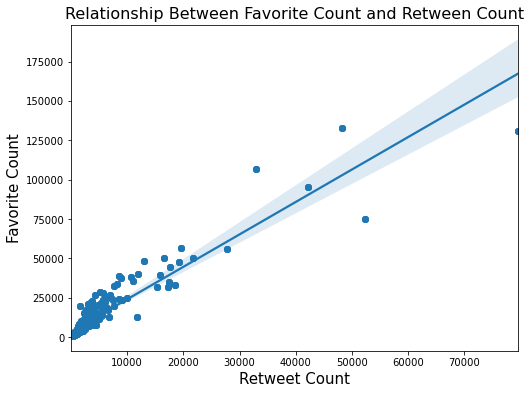

In [78]:
plt.figure(figsize=(8,6))
sns.regplot(x='retweet_count', y='favorite_count', data=rate_dog_clean)
plt.xlabel('Retweet Count', fontsize=15)
plt.ylabel('Favorite Count', fontsize=15)
plt.title('Relationship Between Favorite Count and Retween Count', fontsize=16)

data_corr = rate_dog_clean.corr()

print("Correlation Between favorite counts And retweet counts : ",data_corr.loc['favorite_count','retweet_count'])

The correlation coefficient, which is a statistical text for relationship, between `retweet_count` and `favorite_count` is 0.93; which is an indication that a strong relationship exists between `retweet_count` and `favorite_count`

Question: 
- which dog stage has the highest rating

In [79]:
val_count = rate_dog_clean.groupby(['dog_stage'])['rating'].sum().reset_index()
fig = px.bar(data_frame=val_count,
             x='dog_stage',
             y='rating',
             template='plotly_dark',
             labels=dict(rating='Ratings', dog_stage='Dog Stages'),
             title='Dog Stage with the Highest Ratings')
fig.show()

From the plot, we see that the dog stage with the highest rating is pupper; followed by doggo; then puppo; and the least being floofer